In [1]:
# install the required packages
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading and preparing the MNIST dataset
fashon_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashon_mnist.load_data()

image dimension is: (28, 28)


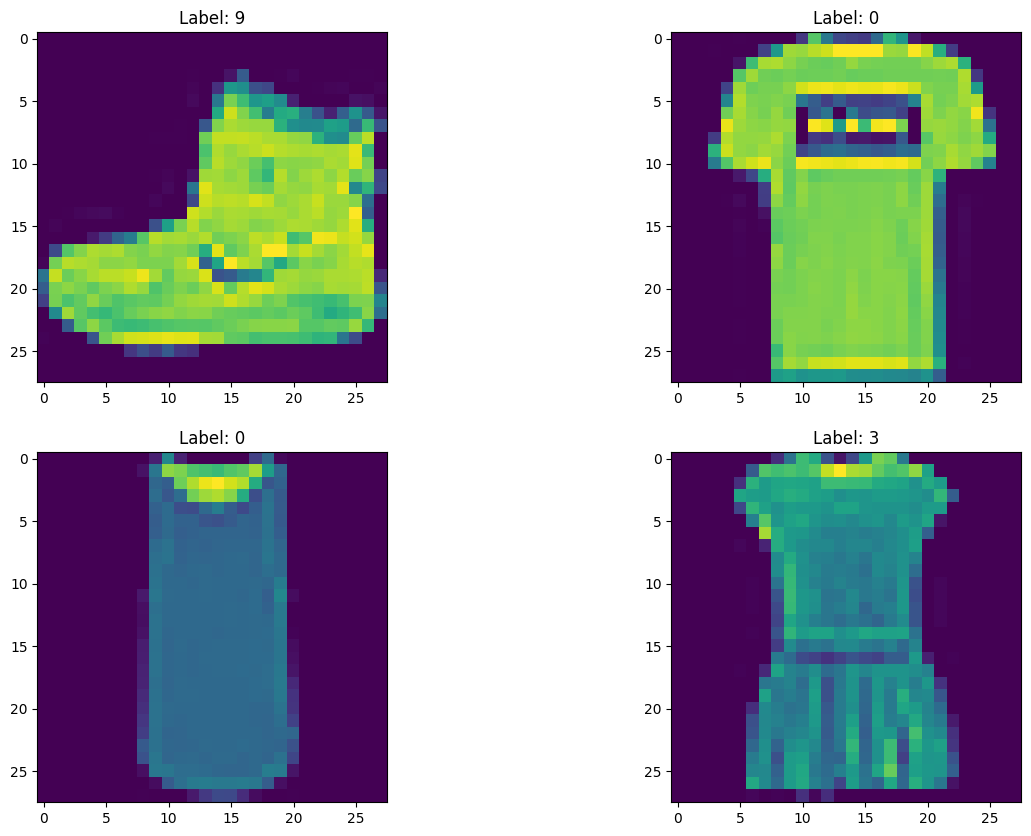

In [4]:
# visualize the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

img_list = train_images[0:4]
img_labels = train_labels[0:4]

for i in range(len(img_list)):
    ax = axes[i // 2, i % 2]
    ax.imshow(img_list[i],)
    ax.set_title(f"Label: {img_labels[i]}")

print(f"image dimension is: {img_list[0].shape}")

In [5]:
#scaling each pixel between 0.0 to 1.0
train_images = train_images / 255
test_images = test_images/ 255

In [6]:
# convert the images to 1D matrix
dim = img_list[0].shape
flat_dim = dim[0] * dim[1]
train_images_flat = train_images.reshape(-1, flat_dim)
test_images_flat = test_images.reshape(-1, flat_dim)


In [7]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Train the model and save the history for plotting
history = model.fit(train_images_flat, train_labels, validation_data=(test_images_flat, test_labels), epochs=10)

# Evalute the model on test data
test_loss, test_acc = model.evaluate(test_images_flat, test_labels, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7662 - loss: 0.6675 - val_accuracy: 0.8405 - val_loss: 0.4504
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8580 - loss: 0.3841 - val_accuracy: 0.8534 - val_loss: 0.4009
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8753 - loss: 0.3401 - val_accuracy: 0.8559 - val_loss: 0.3961
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8835 - loss: 0.3154 - val_accuracy: 0.8713 - val_loss: 0.3591
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8873 - loss: 0.3034 - val_accuracy: 0.8757 - val_loss: 0.3468
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8927 - loss: 0.2861 - val_accuracy: 0.8758 - val_loss: 0.3461
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8990 - loss: 0.2673 - val_accuracy: 0.8776 - val_loss: 0.3512
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9005 - loss: 0.26

In [10]:
def plot_evalution(history):
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = np.arange(1, len(acc) + 1)
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(14, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'o-', label='Training Accuracy', color='blue', linewidth=2, markersize=5)
    plt.plot(epochs, val_acc, 's-', label='Validation Accuracy', color='green', linewidth=2, markersize=5)
    plt.title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'o-', label='Training Loss', color='red', linewidth=2, markersize=5)
    plt.plot(epochs, val_loss, 's-', label='Validation Loss', color='orange', linewidth=2, markersize=5)
    plt.title('Training and Validation Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True)

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plots
    plt.show();

<ipython-input-9-5314b012eff0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


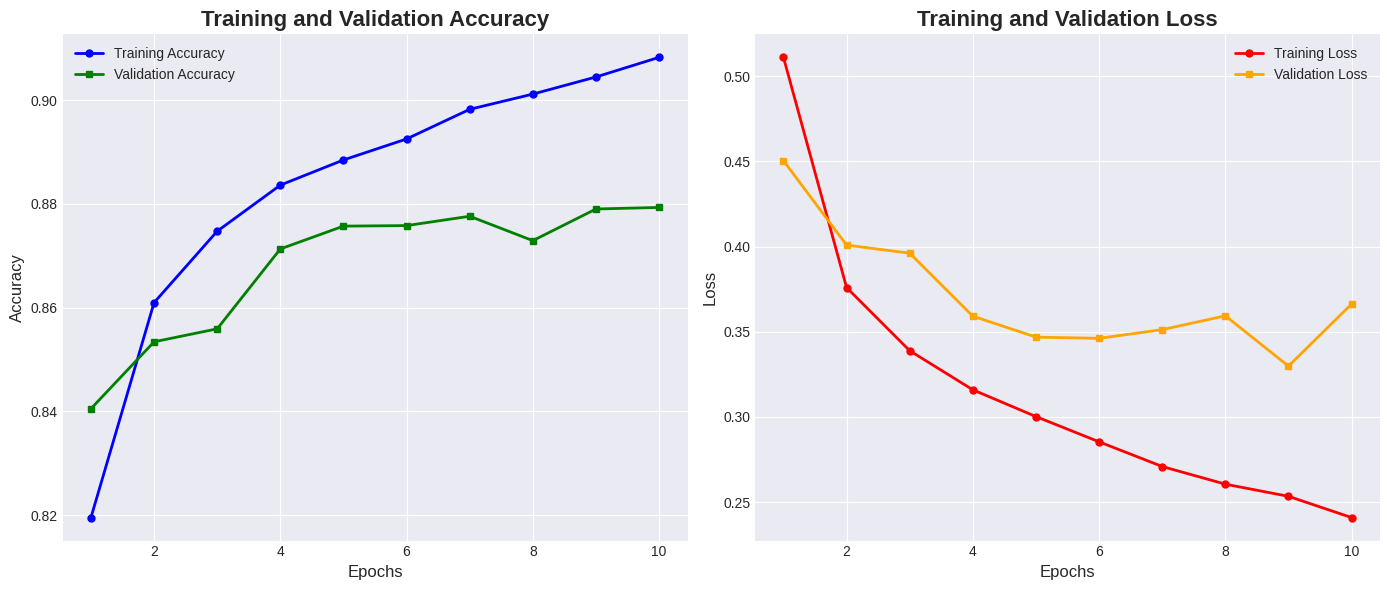

In [9]:
plot_evalution(history)

### there is a slight overfitting !!

In [35]:
model2 = models.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), input_shape=(784,)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model with Stochastic Gradient Descent optemizer
model2.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Train the model and save the history for plotting
history2 = model2.fit(train_images_flat, train_labels, validation_data=(test_images_flat, test_labels), epochs=20)

# Evalute the model on test data
test_loss, test_acc = model2.evaluate(test_images_flat, test_labels, verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3873 - loss: 1.8005 - val_accuracy: 0.7008 - val_loss: 0.9064
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6621 - loss: 1.0314 - val_accuracy: 0.7721 - val_loss: 0.7701
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7192 - loss: 0.8967 - val_accuracy: 0.7987 - val_loss: 0.6999
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7585 - loss: 0.8070 - val_accuracy: 0.8188 - val_loss: 0.6373
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7803 - loss: 0.7531 - val_accuracy: 0.8224 - val_loss: 0.6193
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7949 - loss: 0.7149 - val_accuracy: 0.8326 - val_loss: 0.5966
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8048 - loss: 0.6863 - val_accuracy: 0.8344 - val_loss: 0.5798
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8098 - loss: 0.6680 

<ipython-input-10-789ab43c5285>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


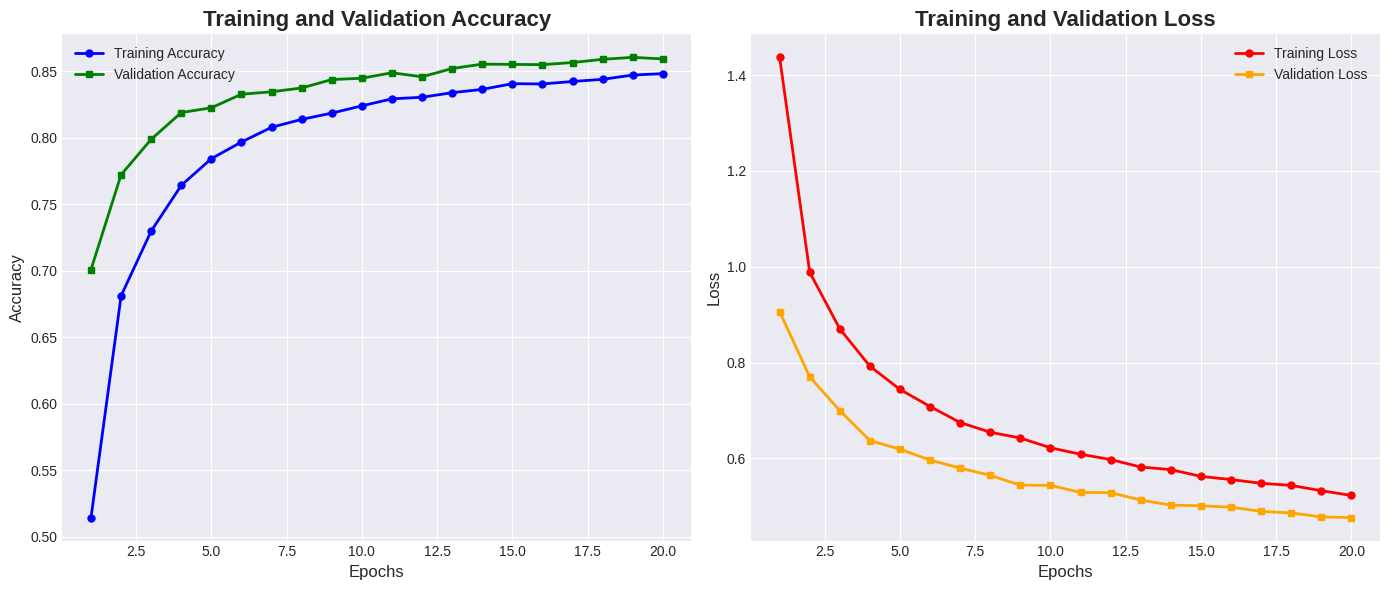

In [37]:
plot_evalution(history2)

by appling regularization and dropout we reduce the overfitting

In [39]:
# model impement sigmoid as activation function
model3 = models.Sequential([
    layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), input_shape=(784,)),
    layers.Dense(64, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model with Stochastic Gradient Descent optemizer
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Train the model and save the history for plotting
history3 = model3.fit(train_images_flat, train_labels, validation_data=(test_images_flat, test_labels), epochs=20)

# Evalute the model on test data
test_loss, test_acc = model3.evaluate(test_images_flat, test_labels, verbose=1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5968 - loss: 1.3824 - val_accuracy: 0.8180 - val_loss: 0.6612
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8285 - loss: 0.6197 - val_accuracy: 0.8282 - val_loss: 0.5963
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8449 - loss: 0.5541 - val_accuracy: 0.8313 - val_loss: 0.5794
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8538 - loss: 0.5204 - val_accuracy: 0.8371 - val_loss: 0.5560
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8583 - loss: 0.5060 - val_accuracy: 0.8428 - val_loss: 0.5389
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8590 - loss: 0.4969 - val_accuracy: 0.8416 - val_loss: 0.5364
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8634 - loss: 0.4831 - val_accuracy: 0.8486 - val_loss: 0.5094
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8683 - loss: 0

<ipython-input-10-789ab43c5285>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


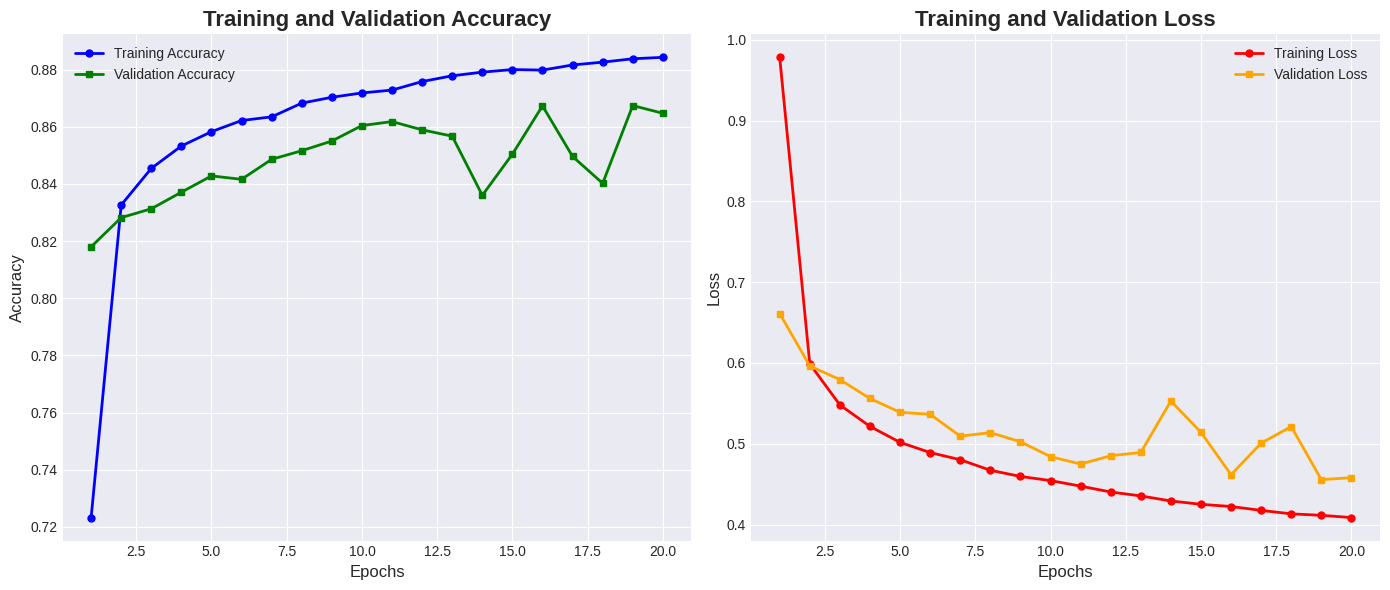

In [41]:
plot_evalution(history3)